Topic: Challenge Set 1

Subject : Explore MTA Turnstile Data

Date: 1 October 2018

Name: Alexy Abramson

**Challenge 1: Open up a new Jupyter Notebook, download a few MTA turnstile data files, then open up some files, use csv reader to read it and ensure there is a column for each feature (C/A, UNIT, SCP, STATION). These are the first four columns.**

In [1]:
# Challenge 1 Answer

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series

df = pd.read_csv('turnstile_180922.csv')
df = df.append(pd.read_csv('turnstile_180915.csv'))
df = df.append(pd.read_csv('turnstile_180908.csv'))
df = df.append(pd.read_csv('turnstile_180901.csv'))
df.columns = df.columns.str.strip()

if "C/A" in df.columns and "UNIT" in df.columns and "SCP" in df.columns and "STATION" in df.columns:
    df.head()

**Challenge 2: Create a new column that specifies the date and time of each entry.**

In [2]:
# Challenge 2 Answer

import dateutil
df['TIMESTAMP'] = df['DATE'] + ' ' + df['TIME']
df['TIMESTAMP'] = df['TIMESTAMP'].apply(dateutil.parser.parse)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIMESTAMP
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,00:00:00,REGULAR,6759219,2291425,2018-09-15 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,04:00:00,REGULAR,6759234,2291429,2018-09-15 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,08:00:00,REGULAR,6759251,2291453,2018-09-15 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,12:00:00,REGULAR,6759330,2291532,2018-09-15 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,16:00:00,REGULAR,6759538,2291574,2018-09-15 16:00:00


**Challenge 3: Calculate to total daily entries for each turnstile.**

In [3]:
# Challenge 3 Answer

df.sort_values(by=['STATION', 'UNIT', 'C/A', 'SCP', 'DATE'], inplace=True)
df['ENTRY_DIFF'] = (df.groupby(['STATION', 'UNIT', 'C/A', 'SCP', 'DATE'])['ENTRIES'].diff(periods=-1)) * -1
df['EXIT_DIFF'] = (df.groupby(['STATION', 'UNIT', 'C/A', 'SCP', 'DATE'])['EXITS'].diff(periods=-1)) * -1
df = df[(df['ENTRY_DIFF'] >= 0)
        & (df['ENTRY_DIFF'] < 100000)
        & (df['EXIT_DIFF'] >= 0)
        & (df['EXIT_DIFF'] < 100000)]

df_entries = df.groupby(['STATION', 'UNIT', 'C/A', 'SCP', 'DATE'])['ENTRY_DIFF'].sum().reset_index()
df_entries.head()

,STATION,UNIT,C/A,SCP,DATE,ENTRY_DIFF
0,1 AV,R248,H007,00-00-00,08/25/2018,1717.0
1,1 AV,R248,H007,00-00-00,08/26/2018,1586.0
2,1 AV,R248,H007,00-00-00,08/27/2018,2856.0
3,1 AV,R248,H007,00-00-00,08/28/2018,3060.0
4,1 AV,R248,H007,00-00-00,08/29/2018,3119.0


**Challenge 4: Now plot the daily time series for a turnstile.**

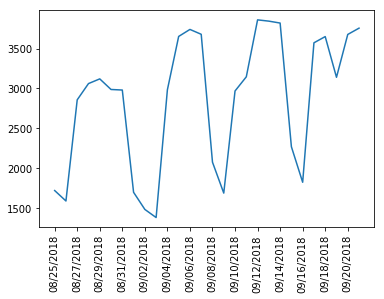

In [4]:
# Challenge 4 Answer

df_scp = df_entries[(df_entries['C/A'] == 'H007')
                    & (df_entries['SCP'] == '00-00-00')]
x = df_scp.DATE; y = df_scp.ENTRY_DIFF
plt.plot(x, y)
plt.xticks(range(0, len(x), 2), rotation=90)
plt.show()

**Challenge 5: Combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.**

In [5]:
# Challenge 5 Answer

df_ca_entries = df.groupby(['STATION', 'UNIT', 'C/A', 'DATE'])['ENTRY_DIFF'].sum().reset_index()
df_ca_entries.head()

,STATION,UNIT,C/A,DATE,ENTRY_DIFF
0,1 AV,R248,H007,08/25/2018,5776.0
1,1 AV,R248,H007,08/26/2018,4945.0
2,1 AV,R248,H007,08/27/2018,8942.0
3,1 AV,R248,H007,08/28/2018,9391.0
4,1 AV,R248,H007,08/29/2018,9679.0


**Challenge 6: Combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.**

In [6]:
# Challenge 6 Answer

df_station_entries = df.groupby(['STATION', 'DATE'])['ENTRY_DIFF'].sum().reset_index()
df_station_entries.head() 

,STATION,DATE,ENTRY_DIFF
0,1 AV,08/25/2018,11388.0
1,1 AV,08/26/2018,9949.0
2,1 AV,08/27/2018,14630.0
3,1 AV,08/28/2018,14969.0
4,1 AV,08/29/2018,15376.0


**Challenge 7: Plot the time series (either daily or your preferred level of granularity) for a station.**

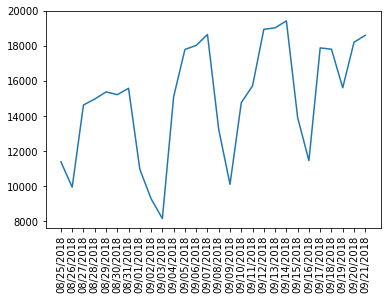

In [7]:
# Challenge 7 Answer
df_1station = df_station_entries[(df_station_entries['STATION']) == '1 AV']

x = df_1station.DATE; y = df_1station.ENTRY_DIFF
plt.plot(x, y)
plt.xticks(range(0, len(x)), rotation=90)
plt.show()

**Challenge 8: Select a station and find the total daily counts for this station. Then plot those daily counts for each week separately.**

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


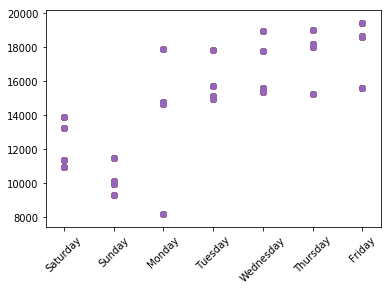

In [8]:
# Challenge 8 Answer

df_week = df_1station
df_week['DATE'] = df_week['DATE'].apply(dateutil.parser.parse)
for week in df_week['DATE'].dt.week.unique():
    x = df_week['DATE'].dt.weekday_name; y = df_week['ENTRY_DIFF']
    plt.scatter(x, y)
    plt.xticks(rotation=45)

**Challenge 9: Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate.**

In [9]:
# Challenge 9 Answer
df_station = df.groupby(['STATION'])['ENTRY_DIFF'].sum().reset_index()
df_station = df_station.sort_values('ENTRY_DIFF', ascending=False)
df_station.head()

,STATION,ENTRY_DIFF
59,34 ST-PENN STA,3461167.0
229,GRD CNTRL-42 ST,3019867.0
57,34 ST-HERALD SQ,2150148.0
222,FULTON ST,2134621.0
14,14 ST-UNION SQ,2126909.0


**Challenge 10: Make a single list of these total ridership values and plot it with plt.hist(total_ridership_counts) to get an idea about the distribution of total ridership among different stations.**

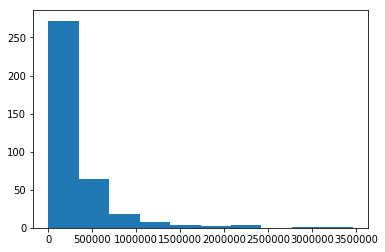

In [10]:
# Challenge 10 Answer
plt.hist(df_station['ENTRY_DIFF']);